<a href="https://colab.research.google.com/github/francomanca93/web-scraping/blob/main/Proyecto_1%3A_Scraper_con_request_y_bs4/Proyecto_Scraper_con_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parsing Pagina12

<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>


En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.

Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

## 1. Descargando una pagina web

In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
p12.status_code

200

In [5]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta proper

In [6]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "P\xc3\xa1gina12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 

In [7]:
p12.headers

{'Date': 'Tue, 10 Nov 2020 15:06:11 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d9cf63936c84129f95ff1c029530648b61605020770; expires=Thu, 10-Dec-20 15:06:10 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"5cc54-J4BM1zuO0Q+tHpce0lVWO5bATz8"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.894', 'X-Instance': 'cache-front-prod-varnish-7f9f4bb47d-sccpd', 'x-restarts': '0', 'X-Cache': 'HIT (2)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '06544a7a2a00000af8be961000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/bea

In [8]:
p12.request.headers

{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
p12.request.method

'GET'

In [10]:
p12.request.url

'https://www.pagina12.com.ar/'

Resumen:

- `p12 = requests.get(url)`: realiza la solicitud.
- `p12.status_code`: muestra el código de status HTTP de la respuesta.
- `print(p12.text)`: muestra el HTML de la página sin formatear.
- `p12.content`: muestra el contenido de la respuesta, puede ser bytes, imágenes, audio.
- `p12.headers`: muestra el encabezado de la respuesta.
- `p12.request.headers`: muestra el encabezado de la solicitud. El contenido de esta request avisa al servidor que se está utilizando requests en python y que no es un navegador convencional. Puede ser modificado.
- `p12-request.url`: muestra la url a la que se le hizo la solicitud.


## 2. Parseando HTML con BeautifulSoup

Extraeremos la informacion que para nosotros es imporante.

In [11]:
from bs4 import BeautifulSoup

In [12]:
s = BeautifulSoup(p12.text, 'html.parser')

In [13]:
type(s)

bs4.BeautifulSoup

In [14]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

Extraemos la clase

In [15]:
s.find('ul', attrs={'class':'main-sections'})

<ul class="horizontal-list main-sections hide-on-dropdown"><li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li><li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li><li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li><li class=" no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li><li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li><li class="hide-on-1040 "><a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a></li></ul>

Especificamos todos los li

In [16]:
s.find('ul', attrs={'class':'main-sections'}).find_all('li')

[<li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class=" no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040 "><a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a></li>]

Extraemos la etiqueta a

In [17]:
s.find('ul', 'main-sections').find_all('a')

[<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>,
 <a href="https://www.pagina12.com.ar/secciones/economia">Economía</a>,
 <a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a>,
 <a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a>,
 <a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a>,
 <a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a>,
 <a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a>]

In [18]:
def get_section_links(url):
  p12 = requests.get(url)
  a_list = []
  try:
    if p12.status_code == 200:
      s = BeautifulSoup(p12.text, 'html.parser')
      a_list = s.find('ul', 'main-sections').find_all('a')
  except Exception as e:
    print('Error')
    print(e)

  return a_list

In [19]:
url = 'https://www.pagina12.com.ar/'
get_section_links(url)

[<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>,
 <a href="https://www.pagina12.com.ar/secciones/economia">Economía</a>,
 <a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a>,
 <a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a>,
 <a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a>,
 <a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a>,
 <a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a>]

## 3. Extrayendo información

In [20]:
secciones = s.find('ul', attrs={'class':'main-sections'}).find_all('li')
secciones

[<li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class=" p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class=" no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040 "><a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a></li>]

In [21]:
seccion = secciones[0]

Accediendo a nodos o tags

In [22]:
seccion.find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [23]:
seccion.a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

En el nodo anterior tenemos:
- El nodo propiamente dicho
- El atributo, en este caso contiene a un enlace
- El texto o contenido del nodo.

In [24]:
seccion.a.get('href') # con get podemos obtener los atributos del nodo o tag

'https://www.pagina12.com.ar/secciones/el-pais'

In [25]:
seccion.a.get_text()

'El país'

Hacemos un list-comprehesion o lista por compresión y para cada seccion vamos a acceder al tag a y vamos a quedarnos con el atributo href

In [26]:
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/plastica']

In [27]:
def get_section_links(url):
  ''' Funcion para traer los links de las secciones'''
  p12 = requests.get(url) # Hacemos un requests a la url que ingresamos
  links_secciones = [] # Lista de links a secciones
  # Intentamos y si hay un error lo atrapamos
  try:
    if p12.status_code == 200:
      s = BeautifulSoup(p12.text, 'html.parser') # Objeto soup
      secciones = s.find('ul', attrs={'class':'main-sections'}).find_all('li') # Buscamos las secciones
      links_secciones = [seccion.a.get('href') for seccion in secciones] # Extraemos los links
  except Exception as e: # Capturamos error
    print('Error')
    print(e)

  return links_secciones

Utilizando la clase requests y haciendo una solicitud con el método get a cada link de la lista anterior, tendremos una primer parte de la web scraper. 

In [28]:
sec = requests.get(links_secciones[1])
sec.status_code #Atributo

200

In [29]:
s_seccion = BeautifulSoup(sec.text, 'html.parser')
print(s_seccion.prettify())

<!DOCTYPE doctype html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Economía | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/economia"},"headline": "Economía | Página12","isAccessibleForFree": false,"image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets

In [30]:
top_content = s_seccion.find('section', attrs={"class":"top-content"})
top_content

<section class="top-content" id="top-content"><!-- Hero --><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/main_article.dust/ --><article class="article-item article-item--main "><!-- Image --><div class="article-item__header deco-bar-here"><a href="https://www.pagina12.com.ar/304881-asignacion-universal-por-embarazo-noviembre-2020-quienes-cob"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt="La Anses armó el cronograma de pago de la Asignación Universal por Embarazo (AUE) según el número de terminación del DNI.    " class="" height="640" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-11/119333-aue-20sept.jpeg?itok=gb3R20iP" srcset="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-11/119333-aue-20sept.jpeg?itok=gb3R20iP 960w, https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-11/119333-aue-20sept.jpeg?itok=trp3WKjH 470w, https:

In [31]:
top_content.a.get('href')

'https://www.pagina12.com.ar/304881-asignacion-universal-por-embarazo-noviembre-2020-quienes-cob'

In [32]:
news = s_seccion.find_all('div', attrs = {'class':'article-item__content'})

In [33]:
links_news = [new.a.get('href') for new in news]
links_news

['https://www.pagina12.com.ar/304881-asignacion-universal-por-embarazo-noviembre-2020-quienes-cob',
 'https://www.pagina12.com.ar/304880-auh-noviembre-2020-quienes-cobran-hoy',
 'https://www.pagina12.com.ar/304878-jubilados-noviembre-2020-quienes-cobran-hoy',
 'https://www.pagina12.com.ar/302746-auh-jubilados-y-pensionados-el-calendario-completo-de-pagos-',
 'https://www.pagina12.com.ar/304733-ypf-reactiva-su-produccion',
 'https://www.pagina12.com.ar/304743-de-narvaez-invirtio-y-sepulto-la-fake-news',
 'https://www.pagina12.com.ar/304746-patear-para-adelante-la-deuda-con-el-fondo-y-freno-al-endeud',
 'https://www.pagina12.com.ar/304756-el-plan-energetico-de-biden',
 'https://www.pagina12.com.ar/304776-sin-dinero-para-pagar-la-prepaga',
 'https://www.pagina12.com.ar/304785-el-dolar-blue-sigue-bajando-y-aflojan-las-tensiones-financie',
 'https://www.pagina12.com.ar/304788-alza-de-los-prestamos-a-las-pymes']

### DESAFIO: Creando funciones para obtener enlaces de una seccion

In [34]:
  import requests
  from bs4 import BeautifulSoup

In [35]:
url = 'https://www.pagina12.com.ar/'
links_secciones = get_section_links(url)
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/plastica']

In [36]:
def get_section_soup(link_section):
  ''' Obtengo una seccion deseada pasandole el link a la sección'''
  section = requests.get(link_section)
  try: 
    if section.status_code == 200:
      soup_section = BeautifulSoup(section.text, 'lxml')
  except Exception as e:
    print('Ocurrio un error')
    print(e)
    print('\n')
  
  return soup_section

In [37]:
economic_section_text = get_section_soup(links_secciones[1])

In [38]:
def get_links_for_section(soup):
  ''' Busca en un objeto soup los links de los articulos'''
  try:
    news = soup.find_all('div', attrs = {'class':'article-item__content'})
    links_news = [new.a.get('href') for new in news]
  except Exception as e:
    print('Error')
    print(e)

  return links_news

In [39]:
links_economia = get_links_for_section(economic_section_text)
links_economia

['https://www.pagina12.com.ar/304881-asignacion-universal-por-embarazo-noviembre-2020-quienes-cob',
 'https://www.pagina12.com.ar/304880-auh-noviembre-2020-quienes-cobran-hoy',
 'https://www.pagina12.com.ar/304878-jubilados-noviembre-2020-quienes-cobran-hoy',
 'https://www.pagina12.com.ar/302746-auh-jubilados-y-pensionados-el-calendario-completo-de-pagos-',
 'https://www.pagina12.com.ar/304733-ypf-reactiva-su-produccion',
 'https://www.pagina12.com.ar/304743-de-narvaez-invirtio-y-sepulto-la-fake-news',
 'https://www.pagina12.com.ar/304746-patear-para-adelante-la-deuda-con-el-fondo-y-freno-al-endeud',
 'https://www.pagina12.com.ar/304756-el-plan-energetico-de-biden',
 'https://www.pagina12.com.ar/304776-sin-dinero-para-pagar-la-prepaga',
 'https://www.pagina12.com.ar/304785-el-dolar-blue-sigue-bajando-y-aflojan-las-tensiones-financie',
 'https://www.pagina12.com.ar/304788-alza-de-los-prestamos-a-las-pymes']

In [40]:
def main():
  ''' Funcion principal que junta a todas las funciones anteriores'''
  links_secciones = []
  links_scrapeados = []

  print('Extrayendo links de la seccion que queremos')
  url = 'https://www.pagina12.com.ar'
  links_secciones = get_section_links(url)

  print('Selecciona el link a scrapear')
  for i, link in enumerate(links_secciones):
    print(f'Opcion {i}: {link}')
  
  user = int(input('Opcion: ')) # Entrada de usuario

  try:
      section_text = get_section_soup(links_secciones[user]) # Obtenemos texto
  except IndexError:
      print('Invalid Option')

  links_scrapeados = get_links_for_section(section_text) # Scraper de links

  for link in links_scrapeados:
    print(f'Link: {link}')
  
  return links_scrapeados

In [41]:
if __name__ == '__main__':
  main()

Extrayendo links de la seccion que queremos
Selecciona el link a scrapear
Opcion 0: https://www.pagina12.com.ar/secciones/el-pais
Opcion 1: https://www.pagina12.com.ar/secciones/economia
Opcion 2: https://www.pagina12.com.ar/secciones/sociedad
Opcion 3: https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos
Opcion 4: https://www.pagina12.com.ar/secciones/deportes
Opcion 5: https://www.pagina12.com.ar/secciones/el-mundo
Opcion 6: https://www.pagina12.com.ar/secciones/plastica
Opcion: 3


  ## 4. Manejo de errores

Cuando ocurre algún error en el código, Python detiene la ejecución y nos devuelve una **excepción**, que no es más que una señal que ha occurrido un funcionamiento no esperado o error en el programa, indicándonos aproximadamente qué fue lo que ocurrió.

Para hacer esto podemos usar la sentencia `try-except`, que nos permite **probar (Try)** una sentencia y **capturar un eventual error** y hacer algo al respecto **(except)** en lugar de detener el programa directamente.

```py
try:
  codigo...
except Exception as e:
  print('Error')
  print(e)
```

Excelente link para aprender como tratar errores con mas detalles: [Tratamiento de errores. Sentencia try-except](http://research.iac.es/sieinvens/python-course/source/errores_depuracion.html)

## 5. Descargando contenido

In [42]:
links_scraper = main()

Extrayendo links de la seccion que queremos
Selecciona el link a scrapear
Opcion 0: https://www.pagina12.com.ar/secciones/el-pais
Opcion 1: https://www.pagina12.com.ar/secciones/economia
Opcion 2: https://www.pagina12.com.ar/secciones/sociedad
Opcion 3: https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos
Opcion 4: https://www.pagina12.com.ar/secciones/deportes
Opcion 5: https://www.pagina12.com.ar/secciones/el-mundo
Opcion 6: https://www.pagina12.com.ar/secciones/plastica
Opcion: 1
Link: https://www.pagina12.com.ar/304881-asignacion-universal-por-embarazo-noviembre-2020-quienes-cob
Link: https://www.pagina12.com.ar/304880-auh-noviembre-2020-quienes-cobran-hoy
Link: https://www.pagina12.com.ar/304878-jubilados-noviembre-2020-quienes-cobran-hoy
Link: https://www.pagina12.com.ar/302746-auh-jubilados-y-pensionados-el-calendario-completo-de-pagos-
Link: https://www.pagina12.com.ar/304733-ypf-reactiva-su-produccion
Link: https://www.pagina12.com.ar/304743-de-narvaez-invirtio-y-sep

In [43]:
links_scraper

['https://www.pagina12.com.ar/304881-asignacion-universal-por-embarazo-noviembre-2020-quienes-cob',
 'https://www.pagina12.com.ar/304880-auh-noviembre-2020-quienes-cobran-hoy',
 'https://www.pagina12.com.ar/304878-jubilados-noviembre-2020-quienes-cobran-hoy',
 'https://www.pagina12.com.ar/302746-auh-jubilados-y-pensionados-el-calendario-completo-de-pagos-',
 'https://www.pagina12.com.ar/304733-ypf-reactiva-su-produccion',
 'https://www.pagina12.com.ar/304743-de-narvaez-invirtio-y-sepulto-la-fake-news',
 'https://www.pagina12.com.ar/304746-patear-para-adelante-la-deuda-con-el-fondo-y-freno-al-endeud',
 'https://www.pagina12.com.ar/304756-el-plan-energetico-de-biden',
 'https://www.pagina12.com.ar/304776-sin-dinero-para-pagar-la-prepaga',
 'https://www.pagina12.com.ar/304785-el-dolar-blue-sigue-bajando-y-aflojan-las-tensiones-financie',
 'https://www.pagina12.com.ar/304788-alza-de-los-prestamos-a-las-pymes']

In [44]:
url_nota = links_scraper[7]

In [45]:
url_nota

'https://www.pagina12.com.ar/304756-el-plan-energetico-de-biden'

Extraccion de datos

![diario](https://static.platzi.com/media/user_upload/4F4-1388fc36-cc42-4bd8-b6ae-b1934ce239d7.jpg)

In [46]:
def extract_data(url_nota):
  ''' Función que recibe la url de la nota de devuelve un diccionario con el scrapper'''
  
  dict_info_scraper = {}
  
  try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
      s_nota = BeautifulSoup(nota.text, 'lxml')

      # Extraer el titulo
      titulo = s_nota.find('h1', attrs = {'class': 'article-title'})
      dict_info_scraper['Titulo'] = titulo.text
      # Extraer autor
      autor = s_nota.find('div', attrs={'class':'article-author'})
      dict_info_scraper['Autor'] = autor.text
      # Extraer fecha del titulo
      fecha = s_nota.find('span', attrs = {'pubdate': 'pubdate'}).get('datetime')
      dict_info_scraper['Fecha'] = fecha
      # Extraer el volanta
      volanta = s_nota.find('h2', attrs = {'class': 'article-prefix'})
      dict_info_scraper['Volanta'] = volanta.text
      # Extraer copete
      try:
        copete = s_nota.find('div', attrs = {'class': 'article-summary'})
        dict_info_scraper['Copete'] = copete.text
      except:
        print(None)
        print('\n')
      # Extraer epigrafe
      epigrafe = s_nota.find('span', attrs = {'class': 'article-main-media-text-image'})
      dict_info_scraper['Epigrafe'] = epigrafe.text
      # Extraer cuerpo
      cuerpo = s_nota.find('div', attrs = {'class': 'article-body diario'}).find_all('p')
      articulo_texto = []
      for parrafo in cuerpo:
        articulo_texto.append(parrafo.text)
      dict_info_scraper['Cuerpo'] = articulo_texto

  except Exception as e:
    print('Error')
    print(e)
    print('\n')
  
  return dict_info_scraper # Dictionary

In [47]:
datos = extract_data(url_nota)
datos

{'Autor': 'Por Javier Lewkowicz',
 'Copete': 'Promete “descarbonizar” el sector eléctrico, desestimular los combustibles fósiles, apoyar las renovables e impulsar el auto eléctrico.',
 'Cuerpo': ['Uno de los giros que tomaría la gestión de los Estados Unidos a cargo de Joe Biden está vinculado al cambio climático. Biden promete “descarbonizar” el sector eléctrico para 2035, desestimular el uso de los combustibles fósiles, apoyar las renovables y dar impulso al auto eléctrico para encarrilar a los Estados Unidos hacia la neutralidad de emisiones de carbono en 2050. Es una postura opuesta a la de Donald Trump, quien echó hacia atrás regulaciones establecidas por la administración de Barack Obama y sacó a los Estados Unidos del Acuerdo de París con un discurso de escepticismo frente a la evidencia científica. Especialistas consultados explican dónde puede haber cambios y dónde continuidad. El cambio climático será fuente de tensión diplomática con China.',
  'Biden asegura que va a poner 

## 6. Contenido multimedia

In [48]:
try:
  nota = requests.get(url_nota)
  if nota.status_code == 200:
    s_nota = BeautifulSoup(nota.text, 'lxml')
except Exception as e:
  print(e)

media = s_nota.find('div', attrs = {'class': 'article-main-media-image'})
imagenes = media.find_all('img')
imagenes

[<img alt="Una barrera clave para un mayor uso del auto eléctrico es la falta de estaciones de carga." class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-11/119345-12-20a.jpeg?itok=uJ9AiWKX" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Una barrera clave para un mayor uso del auto eléctrico es la falta de estaciones de carga." class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-11/119345-12-20a.jpeg?itok=LUxfh3Uv" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Una barrera clave para un mayor uso del auto eléctrico es la falta de estaciones de carga." class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-11/119345-12-20a.jpeg?itok=LUxfh3Uv" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Una

In [49]:
if len(imagenes) == 0:
  print('No se encontraron imagenes')
else: 
  imagen = imagenes[3] #.find('img', attrs = {'class': 'show-for-large-only'})
  img_src = imagen.get('data-src')
  print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-11/119345-12-20a.jpeg?itok=LUxfh3Uv


In [50]:
img_req = requests.get(img_src)
img_req.status_code

200

In [51]:
from IPython.display import Image

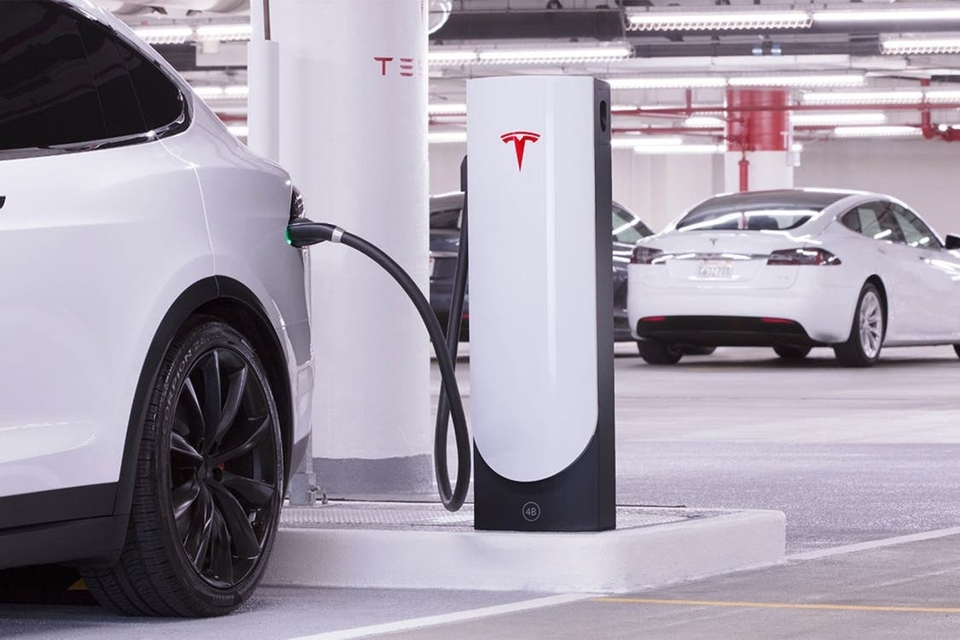

In [52]:
Image(img_req.content) # CONTENIDO MULTIMEDIA

Unificando lo hecho en una unica función:


In [53]:
def extract_content_multimedia(url_nota):
  ''' Función para descargar imagen principal de la nota. Ingremosa la url de la nota y devolvemos imagen'''
  try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
      # Buscamos las imagenes.
      s_nota = BeautifulSoup(nota.text, 'lxml')
      media = s_nota.find('div', attrs = {'class': 'article-main-media-image'})
      imagenes = media.find_all('img')
      if len(imagenes) == 0:
        print('No se encontraron imagenes')
      else: 
        imagen = imagenes[3] # Del conjunto de imagenes, escogemos la 4ta (3), ya que es la imagen principal
        img_src = imagen.get('data-src') # Traemos el link de la imagen
        img_req = requests.get(img_src) # Requests al link de la imagen
        if img_req.status_code == 200:
          return Image(img_req.content) # Retornamo imagen. Dependece >> from IPython.display import Image <<

  except Exception as e:
    print(e)  

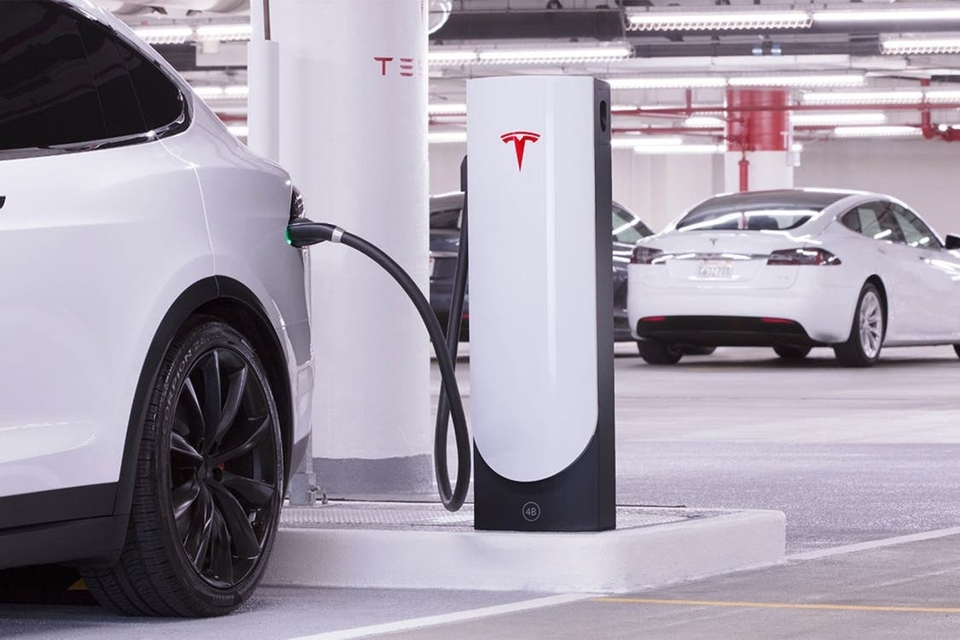

In [54]:
extract_content_multimedia(url_nota)